# DATA 201: Week 7 Pandas Exercise
For this exercise we will look at Hospital Data: https://www.ahd.com/states/hospital_VA.html

Note: This website is an example of nicely formatted html table that can be read using pandas. It is not necessarily thorougly vetted information. There will be a backup CSV file in the data folder.

**Read in the data from the website into a Pandas Dataframe**:
1. Bar chart of the top ten largest hospitals in Virginia in order
2. Create a column in your dataframe "RevenuePerBed" based on the revenue and staffed beds
    - Note: Delete the Total row
3. Create a scatter plot of the revenue per bed vs the number of beds
5. Rename Gross PatientRevenue (\$000) to Revenue
4. Other plots will be specified during class
    -Top 10 hospitals by stay duration (numberofdays/totaldischarges) (Bar Chart)
    -Plotly map hospitals - colorbar indicates number of beds
5. Your plots must be properly labeled with units!
6. Top ten hospitals by state duration (numberofdays/totaldischarge) (bar chart)
7. Plotly map hospitals- colorbar indicates number of beds
**Questions**
1. What is the average and median number of beds per hospital (excluding missing data)
2. Which hospitals have the largest and smallest number of beds (excluding missing data)
3. Which hospital is the most profitable per bed?
4. Which city has the most number of hospital beds?

### Import pandas and matplot library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read in data from web page

In [2]:
# df = pd.read_html("https://www.ahd.com/states/hospital_VA.html")

In [3]:
df1 = pd.read_pickle("../data/backup.pkl")

In [4]:
df1

,Hospital Name,City,StaffedBeds,TotalDischarges,PatientDays,Gross PatientRevenue ($000)
0,VCU Community Memorial Hospital,South Hill,206,3033,14414,"$362,683"
1,633d Medical Group -Langley Air Force Base,Hampton,0,0,0,$0
2,Augusta Health,Fishersville,242,10802,39515,"$1,095,583"
3,Bon Secours - Southampton Memorial Center,Franklin,204,1663,5728,"$247,313"
4,Bon Secours - Southern Virginia Medical Center,Emporia,80,981,3237,"$223,271"
...,...,...,...,...,...,...
86,Virginia Hospital Center,Arlington,365,23374,96351,"$1,477,088"
87,Warren Memorial Hospital,Front Royal,166,1561,4711,"$170,668"
88,Winchester Medical Center,Winchester,495,20184,108640,"$1,436,802"
89,Wythe County Community Hospital,Wytheville,100,1809,6181,"$251,111"


In [5]:
df1.head()

,Hospital Name,City,StaffedBeds,TotalDischarges,PatientDays,Gross PatientRevenue ($000)
0,VCU Community Memorial Hospital,South Hill,206,3033,14414,"$362,683"
1,633d Medical Group -Langley Air Force Base,Hampton,0,0,0,$0
2,Augusta Health,Fishersville,242,10802,39515,"$1,095,583"
3,Bon Secours - Southampton Memorial Center,Franklin,204,1663,5728,"$247,313"
4,Bon Secours - Southern Virginia Medical Center,Emporia,80,981,3237,"$223,271"


In [6]:
# df = pd.read_csv("../data/backup.pkl")

In [7]:
# df1.to_pickle("../data/backup.pkl")

In [8]:
# df = pd.read_pickle("../data/backup.pkl")

In [9]:
df1

,Hospital Name,City,StaffedBeds,TotalDischarges,PatientDays,Gross PatientRevenue ($000)
0,VCU Community Memorial Hospital,South Hill,206,3033,14414,"$362,683"
1,633d Medical Group -Langley Air Force Base,Hampton,0,0,0,$0
2,Augusta Health,Fishersville,242,10802,39515,"$1,095,583"
3,Bon Secours - Southampton Memorial Center,Franklin,204,1663,5728,"$247,313"
4,Bon Secours - Southern Virginia Medical Center,Emporia,80,981,3237,"$223,271"
...,...,...,...,...,...,...
86,Virginia Hospital Center,Arlington,365,23374,96351,"$1,477,088"
87,Warren Memorial Hospital,Front Royal,166,1561,4711,"$170,668"
88,Winchester Medical Center,Winchester,495,20184,108640,"$1,436,802"
89,Wythe County Community Hospital,Wytheville,100,1809,6181,"$251,111"


In [10]:
# drop the last row (total row)
df1 = df1.drop(90)

In [11]:
df1.head()

,Hospital Name,City,StaffedBeds,TotalDischarges,PatientDays,Gross PatientRevenue ($000)
0,VCU Community Memorial Hospital,South Hill,206,3033,14414,"$362,683"
1,633d Medical Group -Langley Air Force Base,Hampton,0,0,0,$0
2,Augusta Health,Fishersville,242,10802,39515,"$1,095,583"
3,Bon Secours - Southampton Memorial Center,Franklin,204,1663,5728,"$247,313"
4,Bon Secours - Southern Virginia Medical Center,Emporia,80,981,3237,"$223,271"


In [12]:
df1 = df1[df1['StaffedBeds'] != 0]

### Bar chart of the top ten largest hospitals in Virginia

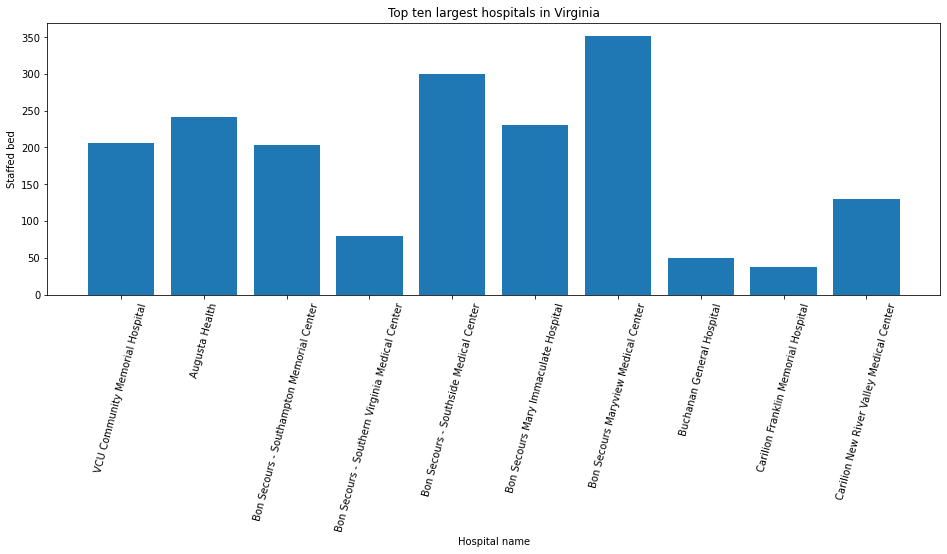

In [14]:
plt.figure(figsize=(16,5))
plt.bar(df1[:10]["Hospital Name"], df1[:10]["StaffedBeds"])
plt.xticks(rotation=75)
plt.title("Top ten largest hospitals in Virginia")
plt.xlabel("Hospital name")
plt.ylabel("Staffed bed")
plt.show()

### Bar chart of the top ten largest hospitals in Virginia in order

In [15]:
df_sorted = df1.sort_values("StaffedBeds")

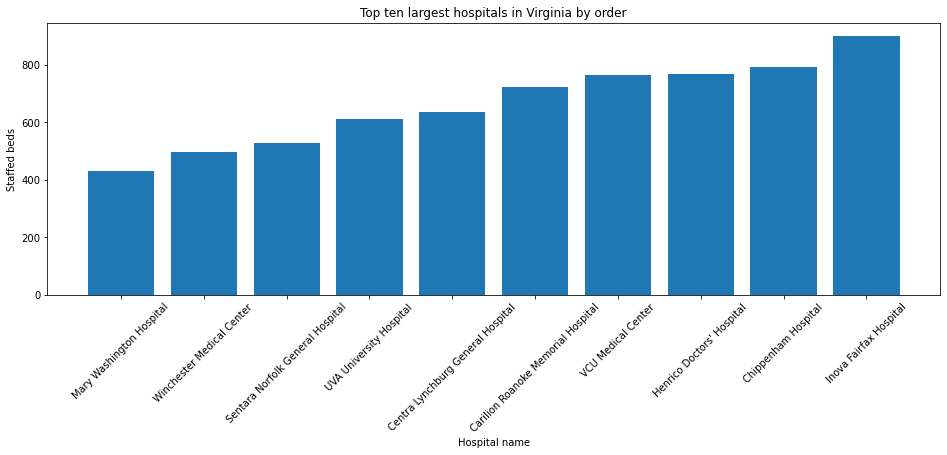

In [24]:
n = 10
plt.figure(figsize=(16,5))
plt.bar(df_sorted[-n:]["Hospital Name"],df_sorted["StaffedBeds"][-n:])
plt.xticks(rotation=45)
plt.title("Top ten largest hospitals in Virginia by order")
plt.xlabel("Hospital name")
plt.ylabel("Staffed beds")
plt.show()

### Bar chart of top 10 hospitals by stay duration 

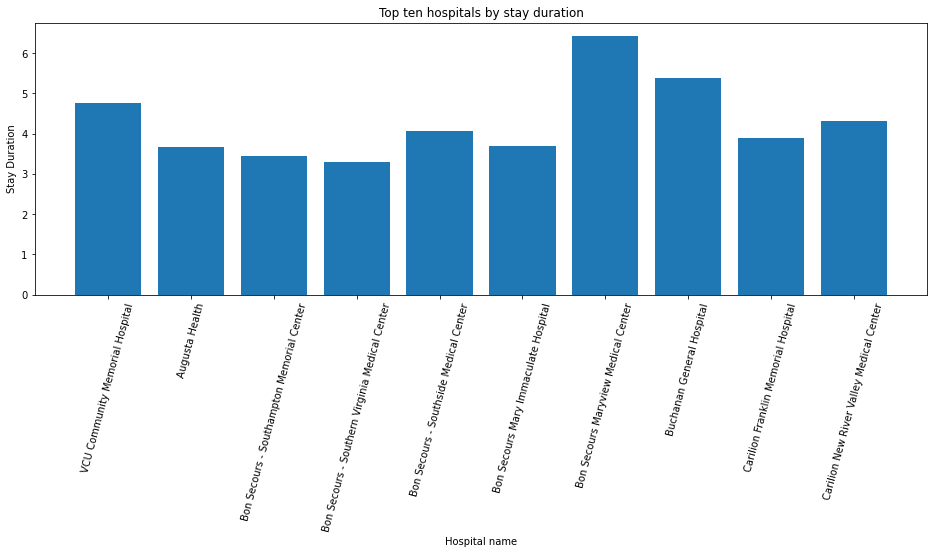

In [16]:
plt.figure(figsize=(16,5))
plt.bar(df1[:10]["Hospital Name"], (df1[:10]["PatientDays"] / df1[:10]["TotalDischarges"]))
plt.xticks(rotation=75)
plt.title("Top ten hospitals by stay duration")
plt.xlabel("Hospital name")
plt.ylabel("Stay Duration")
plt.show()

In [20]:
df1["Gross PatientRevenue ($000)"] = df1["Gross PatientRevenue ($000)"].str.replace("$","",regex=True)
df1["Gross PatientRevenue ($000)"] = df1["Gross PatientRevenue ($000)"].str.replace(",","",regex=True)
pd.to_numeric(df1["Gross PatientRevenue ($000)"])
df1["Revenue"] = pd.to_numeric(df1["Gross PatientRevenue ($000)"])

In [21]:
final_df = df1.drop(['Gross PatientRevenue ($000)'], axis=1)

In [22]:
final_df["RevenuePerBed"] = df1["Revenue"] / df1["StaffedBeds"]

In [27]:
# check for na in the data frame
final_df.isnull().values.any()

False

In [ ]:
final_df = final_df.dropna()

### Scatter plot of revenue per bed vs number of bed

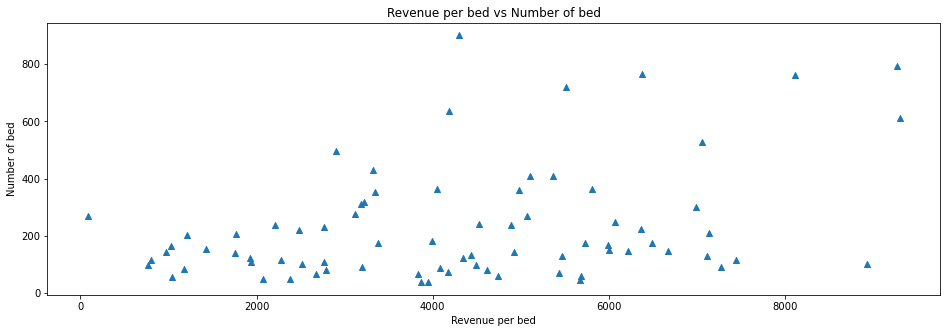

In [23]:
plt.figure(figsize=(16,5))
plt.scatter(final_df["RevenuePerBed"], final_df["StaffedBeds"], marker='^')
plt.title("Revenue per bed vs Number of bed")
plt.xlabel("Revenue per bed")
plt.ylabel("Number of bed")
plt.show()

### 1/ What is the average and median number of beds per hospital (excluding missing data)?

In [ ]:
total_beds = final_df["StaffedBeds"].sum()


In [ ]:
total_rows = len(final_df.index)

In [ ]:
average_beds = total_beds / total_rows

In [ ]:
average_beds

In [ ]:
df_sort_beds = final_df["StaffedBeds"].sort_values()

In [ ]:
df_sort_beds.median()

### 2/ Which hospitals have the largest and smallest number of beds (excluding missing data)?

In [ ]:
final_df["Hospital Name"].loc[final_df["StaffedBeds"].idxmax()]

In [ ]:
final_df = final_df[final_df['StaffedBeds'] != 0]

In [ ]:
final_df["Hospital Name"].loc[final_df["StaffedBeds"].idxmin()]

### 3/ Which hospital is the most profitable per bed?

In [ ]:
final_df["Hospital Name"].loc[final_df["StaffedBeds"].idxmax()]

### 4/ Which city has the most number of hospital beds?

In [ ]:
final_df["City"].loc[final_df["StaffedBeds"].idxmax()]

### 5/

In [ ]:
final_df["StayDuration"] = final_df["PatientDays"] / final_df["TotalDischarges"]

In [ ]:
final_df = final_df[final_df['TotalDischarges'] != 0]

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator =  Nominatim(user_agent="your_name")

In [ ]:
location = geolocator.geocode("Newport News, Virginia")
print(location)

In [ ]:
location.latitude

In [ ]:
location.longitude

In [ ]:
final_df.iloc[0]["City"]

In [ ]:
pd.set_option('display.max_rows',100)


In [ ]:
lat = []
long = []
for i in range(len(final_df.index)):
    city = final_df.iloc[i]["City"]
    location = geolocator.geocode(f"{city}, Virginia")
    lat.append(location.latitude)
    long.append(location.longitude)
    


In [ ]:
lat_series = pd.Series(lat, index=final_df.index)
long_series = pd.Series(long, index=final_df.index)

In [ ]:
final_df["Latitude"] = lat_series
final_df["Longitude"] = long_series

In [ ]:
import plotly.graph_objects as go

In [ ]:
final_df["Hospital Name"] = final_df["Hospital Name"].astype(str) + " - " + final_df["StaffedBeds"].astype(str)

### Plotly map hospitals

In [ ]:
fig = go.Figure(data=go.Scattergeo(locationmode="USA-states",
                                  lon=final_df["Longitude"],
                                  lat=final_df["Latitude"],
                                  mode='markers',
                                  text=final_df["Hospital Name"],
                                  marker=dict(size=8,
                                             opacity=0.8,
                                             colorscale="sunset",
                                             color=final_df["StaffedBeds"],
                                             cmin=final_df["StaffedBeds"].min(),
                                             cmax=final_df["StaffedBeds"].max())))
fig.update_layout(title="Number of beds per hospital in Virginia",
                 autosize=True,
                 geo=dict(scope="usa",
                         projection_type="albers usa",
                         showland=True,
                         landcolor="rgb(0,44,118)",
                         subunitcolor="rgb(217,217,217)",
                         countrycolor="rgb(217,217,217)",
                         subunitwidth=0.5,
                         countrywidth=0.5))
fig.update_geos(fitbounds="locations")
fig.show()

In [ ]:
df_city = final_df.groupby('City').sum()

In [ ]:
df_city_sorted = df_city.sort_values("StaffedBeds", ascending=True)

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(df_city_sorted.index, df_city_sorted["StaffedBeds"])
plt.show()

In [ ]:
#plt.style.available

In [ ]:
plt.style.use("dark_background")

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(df_city_sorted.index, df_city_sorted["StaffedBeds"])
plt.show()

In [ ]:
plt.style.use("seaborn")

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(df_city_sorted.index, df_city_sorted["StaffedBeds"])
plt.show()

In [ ]:
plt.style.use("seaborn-dark-palette")

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(df_city_sorted.index, df_city_sorted["StaffedBeds"])
plt.show()

In [ ]:
plt.style.use("fivethirtyeight")

In [ ]:
plt.figure(figsize=(10,17))
plt.barh(df_city_sorted.index, df_city_sorted["StaffedBeds"])
plt.show()

### **Questions**

### 1. What is the average and median number of beds per hospital (excluding missing data)
   #### 151.5
### 2. Which hospitals have the largest and smallest number of beds (excluding missing data)
   #### Inova Fairfax Hospital have the largest number of hospital
   #### Carilion Franklin Memorial Hospital have the smallest number of hospital
### 3. Which hospital is the most profitable per bed?
   #### Inova Fairfax Hospital
### 4. Which city has the most number of hospital beds?
   #### Falls Church